In [165]:
# -*- coding: UTF-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud
from ggplot import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)
saved_style_state = matplotlib.rcParams.copy()

In [166]:
movies = pd.read_csv("moviedata.csv", encoding='latin1')
print(movies.shape)
movies = movies.drop_duplicates(subset='movie_title')
print(movies.shape)

(5043, 28)
(4917, 28)


In [167]:
strings = []
for colname, colvalue in movies.iteritems():
    if type(colvalue[1]) == str:
        strings.append(colname)
num_list = movies.columns.difference(strings)

In [168]:
num_movies = movies[num_list]

In [169]:
num_movies = num_movies.fillna(value=0, axis =1)


In [170]:
movies.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [171]:
num_movies.columns

Index([u'actor_1_facebook_likes', u'actor_1_name', u'actor_2_facebook_likes',
       u'actor_2_name', u'actor_3_facebook_likes', u'actor_3_name',
       u'aspect_ratio', u'budget', u'cast_total_facebook_likes', u'color',
       u'content_rating', u'country', u'director_facebook_likes',
       u'director_name', u'duration', u'facenumber_in_poster', u'genres',
       u'gross', u'imdb_score', u'language', u'movie_facebook_likes',
       u'movie_imdb_link', u'movie_title', u'num_critic_for_reviews',
       u'num_user_for_reviews', u'num_voted_users', u'plot_keywords',
       u'title_year'],
      dtype='object')

In [172]:
#Example Movie

row_one = movies.iloc[1]
row_one

color                                                                    Color
director_name                                                   Gore Verbinski
num_critic_for_reviews                                                     302
duration                                                                   169
director_facebook_likes                                                    563
actor_3_facebook_likes                                                    1000
actor_2_name                                                     Orlando Bloom
actor_1_facebook_likes                                                   40000
gross                                                              3.09404e+08
genres                                                Action|Adventure|Fantasy
actor_1_name                                                       Johnny Depp
movie_title                         Pirates of the Caribbean: At World's EndÂ 
num_voted_users                                     

In [173]:
# Begin non-value graphs

In [174]:
movies["color"].value_counts()

Color               4694
 Black and White     204
Name: color, dtype: int64

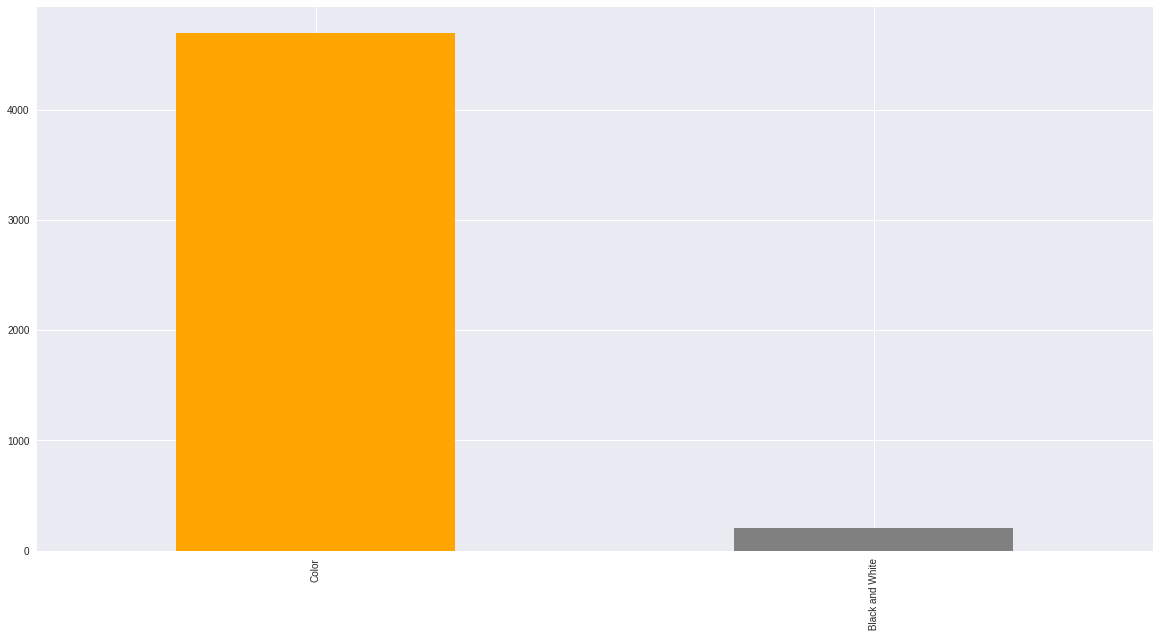

In [175]:
colours = ['orange', 'gray']
movies["color"].value_counts().plot(kind="bar", color=colours)

In [176]:
dname = movies["director_name"].value_counts()
print dname

Steven Spielberg        26
Woody Allen             22
Martin Scorsese         20
Clint Eastwood          20
Ridley Scott            16
Spike Lee               16
Renny Harlin            15
Steven Soderbergh       15
Oliver Stone            14
Tim Burton              14
Robert Zemeckis         13
Joel Schumacher         13
Barry Levinson          13
Ron Howard              13
Robert Rodriguez        13
Tony Scott              12
Kevin Smith             12
Brian De Palma          12
Michael Bay             12
Sam Raimi               11
Rob Reiner              11
Shawn Levy              11
Chris Columbus          11
Francis Ford Coppola    11
Richard Linklater       11
Richard Donner          11
Wes Craven              10
Paul W.S. Anderson      10
Bobby Farrelly          10
John McTiernan          10
                        ..
John Hoffman             1
Gnana Rajasekaran        1
Lance Mungia             1
Bruce Malmuth            1
U. Roberto Romano        1
Lance McDaniel           1
T

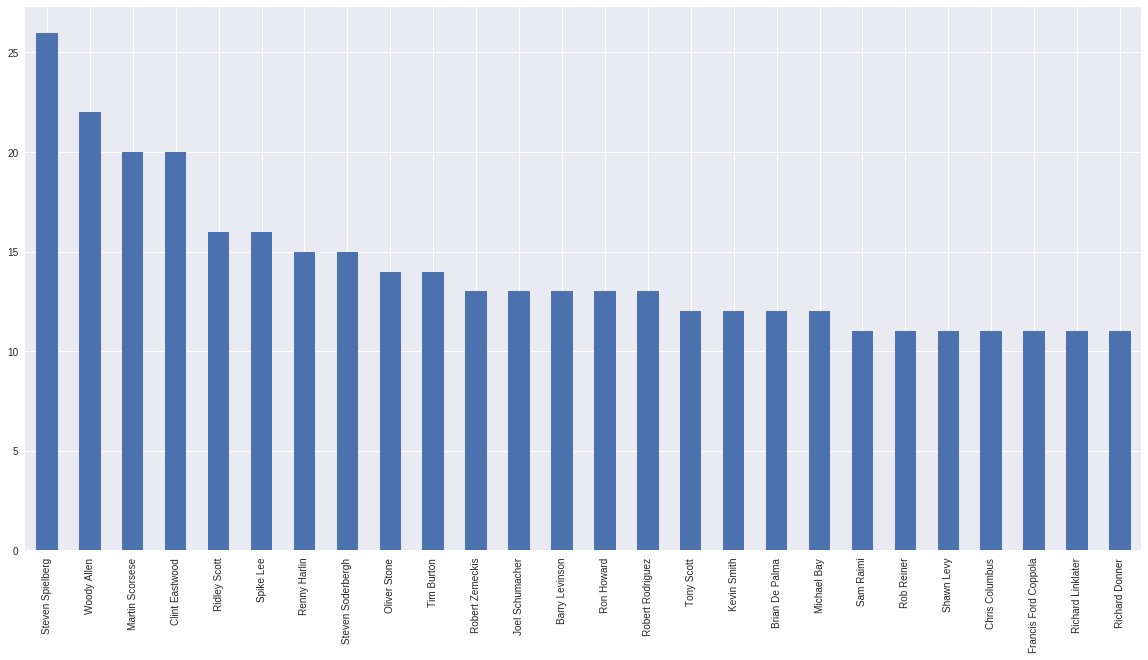

In [177]:
dname[dname > 10].plot(kind="bar")

In [178]:
a1 = movies["actor_1_name"].value_counts()
print a1

Robert De Niro            48
Johnny Depp               36
Nicolas Cage              32
Denzel Washington         29
J.K. Simmons              29
Matt Damon                29
Bruce Willis              28
Harrison Ford             27
Steve Buscemi             27
Liam Neeson               27
Robin Williams            27
Robert Downey Jr.         26
Bill Murray               26
Jason Statham             25
Tom Hanks                 24
Tom Cruise                24
Morgan Freeman            23
Gerard Butler             22
Kevin Spacey              22
Keanu Reeves              22
Christian Bale            22
Anthony Hopkins           21
Philip Seymour Hoffman    20
Leonardo DiCaprio         20
Sylvester Stallone        20
Matthew McConaughey       20
Scarlett Johansson        20
Will Ferrell              20
Will Smith                19
Channing Tatum            18
                          ..
Edgar Arreola              1
Sean Hayes                 1
Cory Hardrict              1
Judie Aronson 

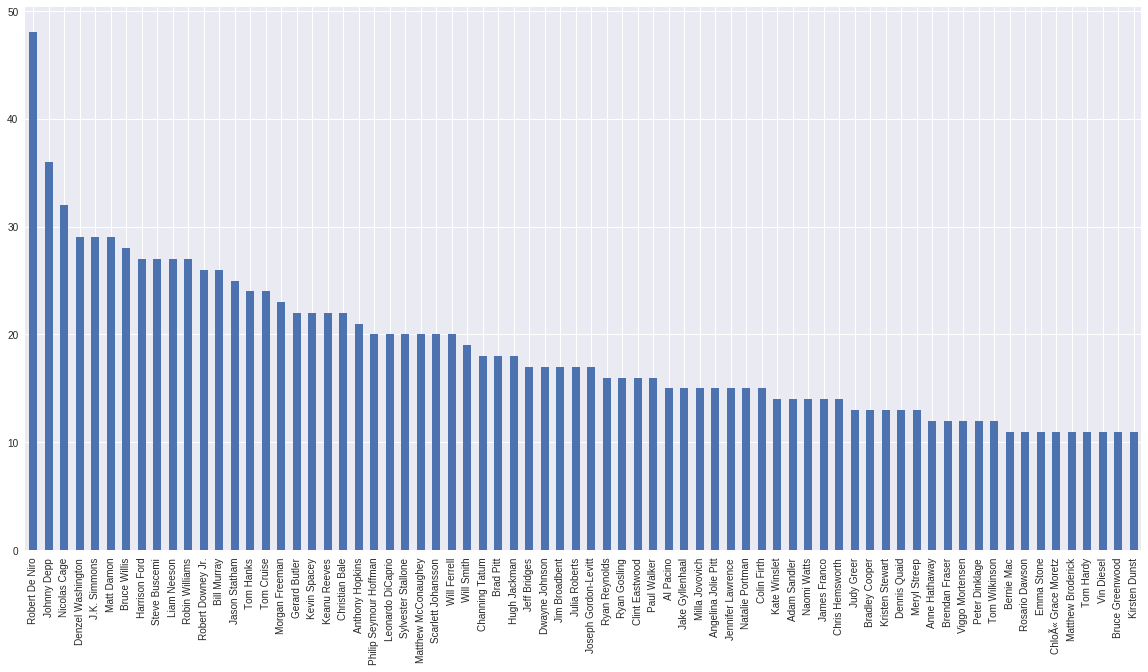

In [179]:
a1[a1 > 10].plot(kind="bar")

In [180]:
a2 = movies["actor_2_name"].value_counts()
print a2

Morgan Freeman           18
Charlize Theron          14
Brad Pitt                13
Meryl Streep             11
James Franco             10
Adam Sandler             10
Will Ferrell              9
Bruce Willis              9
Scott Glenn               9
Jada Pinkett Smith        8
Rosario Dawson            8
Udo Kier                  8
Michael Rapaport          8
Tom Wilkinson             8
Steve Buscemi             8
Judy Greer                8
Angelina Jolie Pitt       8
Zooey Deschanel           8
Jason Flemyng             8
Robert Duvall             8
Kate Winslet              8
Kirsten Dunst             8
Chazz Palminteri          7
Blythe Danner             7
Fred Willard              7
Nia Long                  7
Anthony Hopkins           7
Jay Hernandez             7
William Hurt              7
Dennis Quaid              7
                         ..
Clotilde Hesme            1
Frida Hallgren            1
Maria Conchita Alonso     1
Pat Buchanan              1
Brett Cullen        

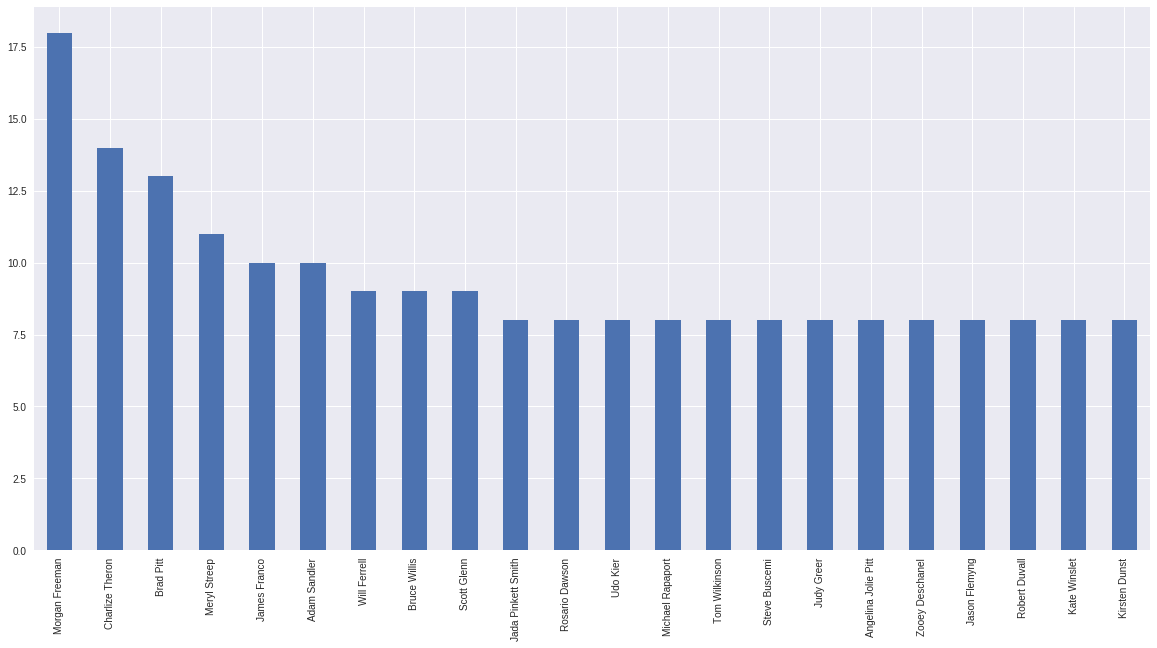

In [181]:
a2[a2 > 7].plot(kind="bar")

In [182]:
a3 = movies["actor_3_name"].value_counts()
print a3

Steve Coogan           8
Sam Shepard            7
Robert Duvall          7
Ben Mendelsohn         7
Stephen Root           7
Jon Gries              7
Reg E. Cathey          6
Shawn Hatosy           6
Mike Epps              6
Tom Wilkinson          6
Bruce McGill           6
John Gielgud           6
Kirsten Dunst          6
Steve Carell           6
Clifton Collins Jr.    6
Joan Allen             6
Ellen Barkin           6
Lois Maxwell           6
Kevin Pollak           6
Hope Davis             6
Paul Sorvino           6
Kevin Dunn             6
Anne Hathaway          6
John Heard             6
Thomas Lennon          6
Jordi MollÃ            5
Richard Schiff         5
Treat Williams         5
Paul Guilfoyle         5
M. Emmet Walsh         5
                      ..
Olivia Wilde           1
Javed Sheikh           1
Liza Lapira            1
Eddie Peng             1
Stephanie Leonidas     1
Kevin Tighe            1
Travis Smith           1
Benno FÃ¼rmann         1
Catherine Schell       1


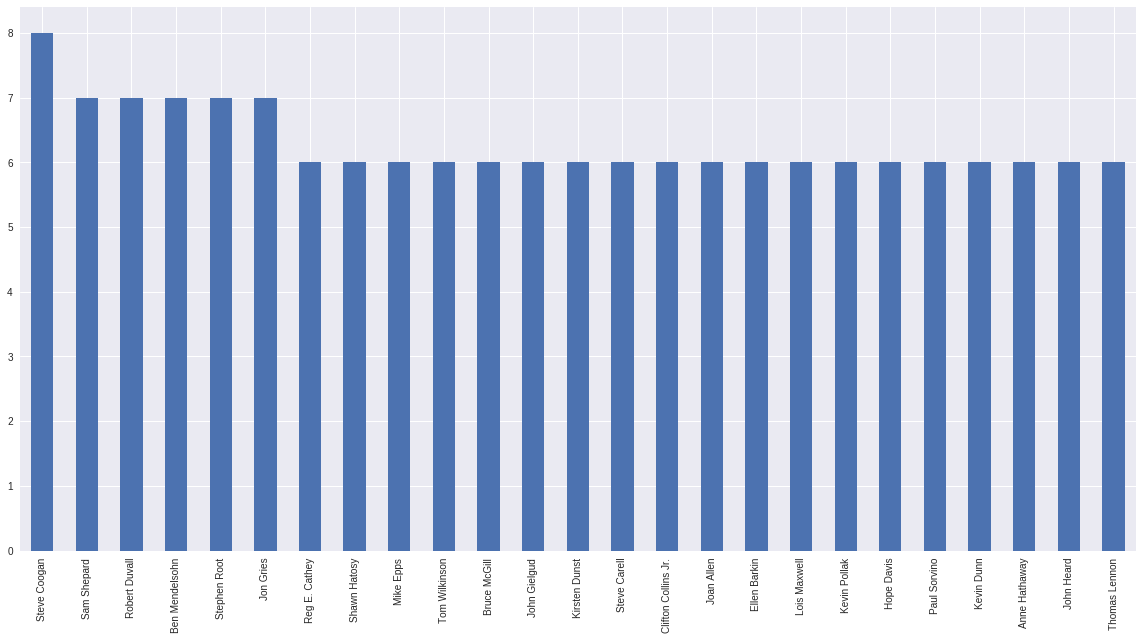

In [183]:
a3[a3 > 5].plot(kind="bar")

In [184]:
genres = movies["genres"].value_counts()
print genres

Drama                                                               233
Comedy                                                              205
Comedy|Drama                                                        189
Comedy|Drama|Romance                                                185
Comedy|Romance                                                      157
Drama|Romance                                                       150
Crime|Drama|Thriller                                                 98
Horror                                                               67
Action|Crime|Drama|Thriller                                          65
Drama|Thriller                                                       62
Action|Crime|Thriller                                                62
Crime|Drama                                                          62
Crime|Drama|Mystery|Thriller                                         53
Horror|Thriller                                                 

In [185]:
gen = movies["genres"].notnull()
movies["genres"][gen].apply(lambda x :x.split("|"))
movies["single_genres"] = movies["genres"][gen].apply(lambda x :x.split("|"))

splitg = movies["single_genres"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)
print splitg

Drama          2533.0
Comedy         1847.0
Thriller       1364.0
Action         1113.0
Romance        1084.0
Adventure       888.0
Crime           868.0
Sci-Fi          594.0
Fantasy         583.0
Horror          539.0
Family          534.0
Mystery         485.0
Biography       291.0
Animation       240.0
Music           212.0
War             210.0
History         202.0
Sport           177.0
Musical         131.0
Documentary     121.0
Western          94.0
Film-Noir         6.0
Short             5.0
News              3.0
Reality-TV        2.0
Game-Show         1.0
dtype: float64


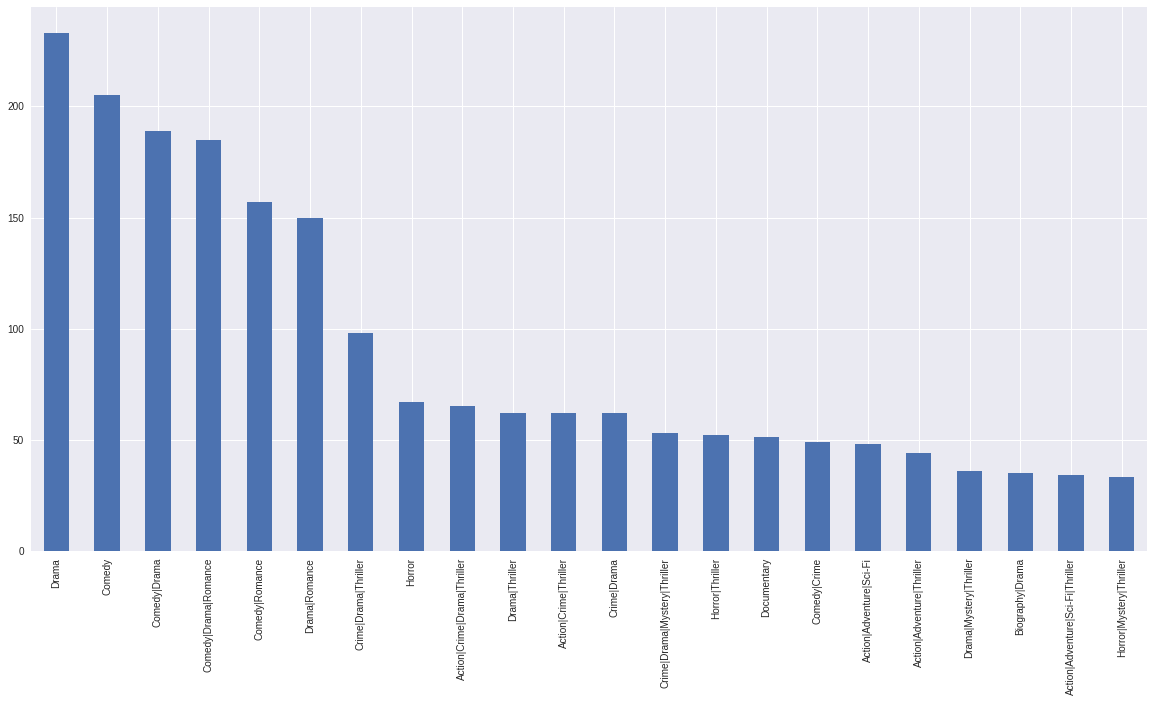

In [186]:
genres[genres > 30].plot(kind="bar")

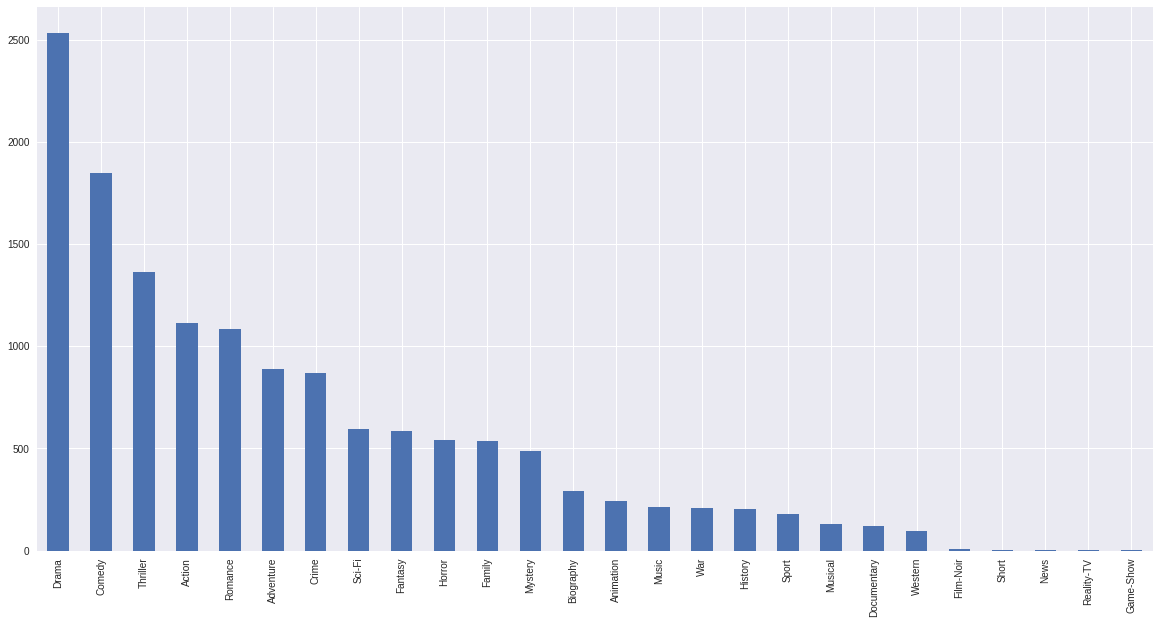

In [187]:
splitg.plot(kind="bar")

In [188]:
keyword = movies["plot_keywords"].notnull()
movies["plot_keywords"][keyword].apply(lambda x :x.split("|"))
movies["good_keywords"] = movies["plot_keywords"][keyword].apply(lambda x :x.split("|"))
gwords = movies["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)
print gwords

love                              191.0
friend                            164.0
murder                            157.0
death                             129.0
police                            125.0
new york city                      91.0
high school                        88.0
alien                              80.0
boy                                71.0
revenge                            70.0
school                             70.0
fbi                                69.0
friendship                         67.0
drugs                              65.0
prison                             62.0
money                              61.0
marriage                           60.0
female protagonist                 56.0
party                              55.0
dog                                55.0
island                             54.0
escape                             53.0
wedding                            52.0
sex                                52.0
detective                          51.0


In [189]:
#tags = movies['plot_keywords'][keyword].copy().str.split('|').apply(pd.Series, 1).stack()
#tags.index = tags.index.droplevel(-1)
#tags.index
#tags.name = 'tags'
#movies_w_tags = movies.join(tags)



In [190]:
#print movies["good_keywords"]
#phraseList = gwords

#def wordCount(phraseList, unwatedWords):
#    wordList = []
#    differentWords = []
#    wordCountList = []
#    unwantedWords = ["and", "an", "is", "the"]
    
#    for phrase in phraseList:
#        for word in phrase.split(" "):
#            wordList.append(word)
            
#    for word in wordList():
#        if word not in differentWords and word not in unwantedWords:
#                differentWords.append(word)
#                wordCountList.append(wordList.count(word))
                
#    print zip(wordCountList, differentWords)


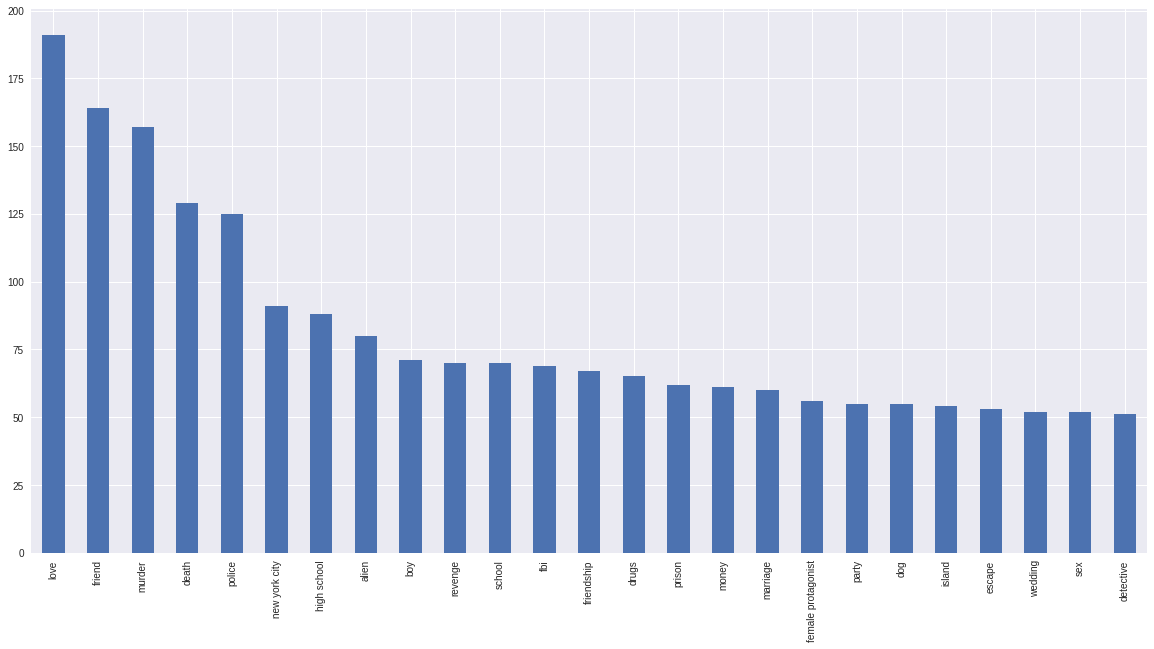

In [191]:
gwords[gwords > 50].plot(kind="bar")

In [192]:
lang = movies["language"].value_counts()
print lang

English       4583
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           7
Arabic           5
Swedish          5
Hebrew           5
Danish           5
Persian          4
Dutch            4
Norwegian        4
Thai             3
Polish           3
Chinese          3
None             2
Zulu             2
Aboriginal       2
Icelandic        2
Romanian         2
Dari             2
Indonesian       2
Urdu             1
Czech            1
Filipino         1
Tamil            1
Slovenian        1
Swahili          1
Aramaic          1
Greek            1
Hungarian        1
Bosnian          1
Kazakh           1
Panjabi          1
Kannada          1
Mongolian        1
Dzongkha         1
Vietnamese       1
Maya             1
Telugu           1
Name: language, dtype: int64


4905
English    322
Name: language, dtype: int64


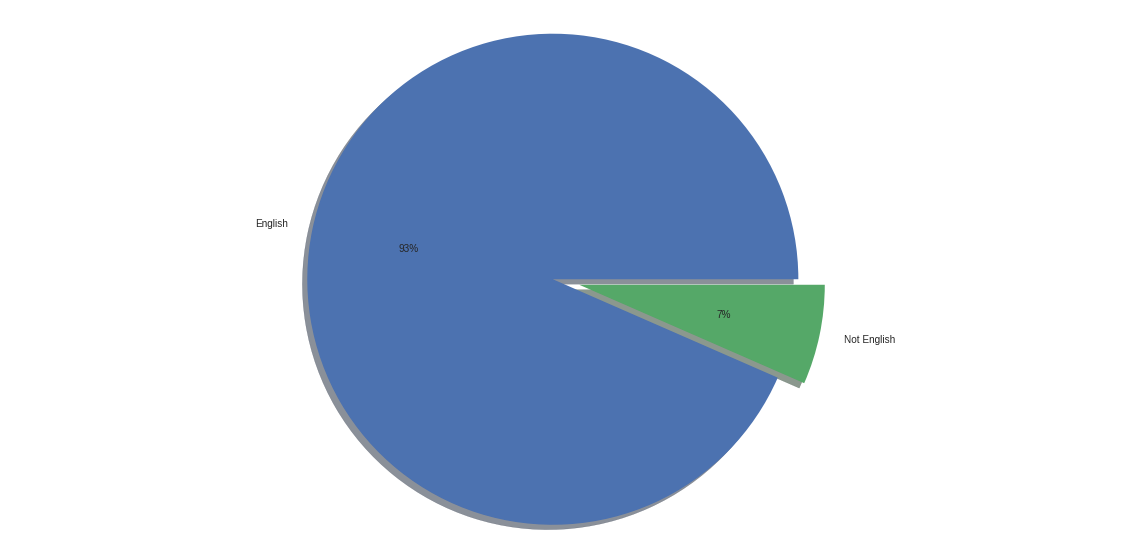

In [193]:
sum_lang = sum(lang)
print sum_lang
minus = sum_lang - lang.head(1)
print minus
labels = ['English', 'Not English']  
explode = (0.1, 0.01)

f, ax1 = plt.subplots()
ax1.pie((lang.head(1), minus), explode=explode, labels=labels, autopct='%1.0f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [194]:
rating = movies["content_rating"].value_counts()
print rating

R            2068
PG-13        1411
PG            686
Not Rated     115
G             112
Unrated        59
Approved       54
TV-14          30
TV-MA          18
TV-PG          13
X              12
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64


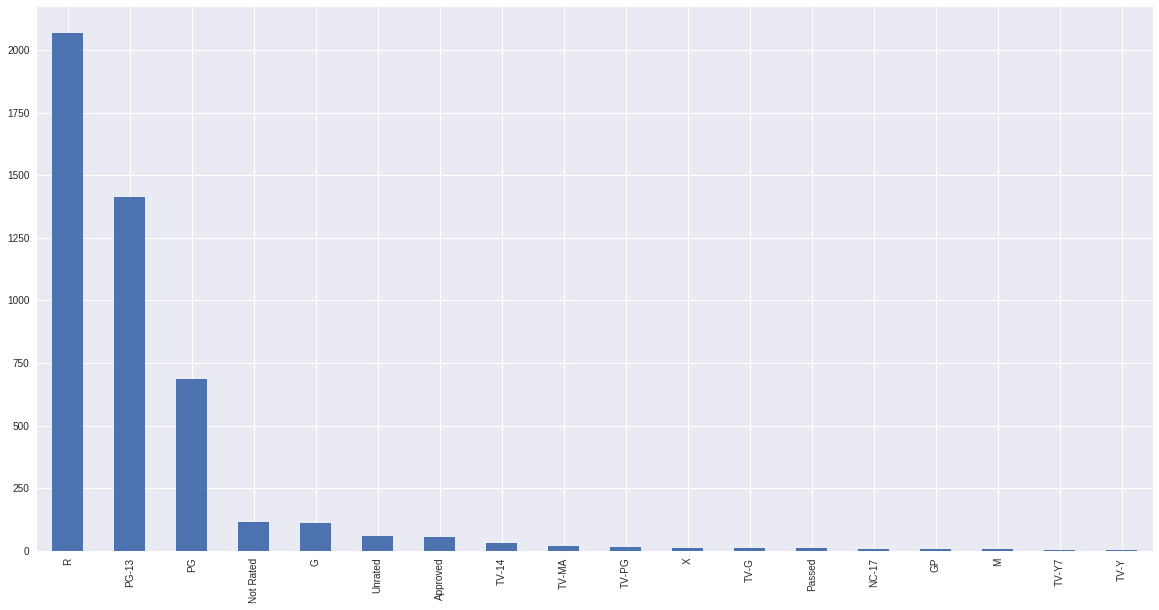

In [195]:
rating.plot(kind="bar")

In [196]:
year = movies["title_year"].value_counts()
print year

2009.0    253
2014.0    243
2006.0    233
2013.0    231
2010.0    225
2011.0    224
2008.0    223
2005.0    216
2012.0    214
2015.0    211
2004.0    207
2002.0    204
2007.0    198
2001.0    183
2003.0    169
2000.0    169
1999.0    167
1998.0    132
1997.0    117
1996.0     98
2016.0     98
1995.0     70
1994.0     54
1993.0     48
1992.0     34
1981.0     32
1987.0     32
1989.0     32
1991.0     31
1988.0     30
         ... 
1959.0      3
1946.0      3
1939.0      3
1951.0      3
1948.0      3
1947.0      3
1960.0      3
1956.0      3
1936.0      2
1929.0      2
1938.0      2
1955.0      2
1937.0      2
1933.0      2
1942.0      2
1949.0      2
1957.0      2
1941.0      1
1920.0      1
1925.0      1
1932.0      1
1934.0      1
1950.0      1
1943.0      1
1916.0      1
1930.0      1
1944.0      1
1958.0      1
1935.0      1
1927.0      1
Name: title_year, dtype: int64


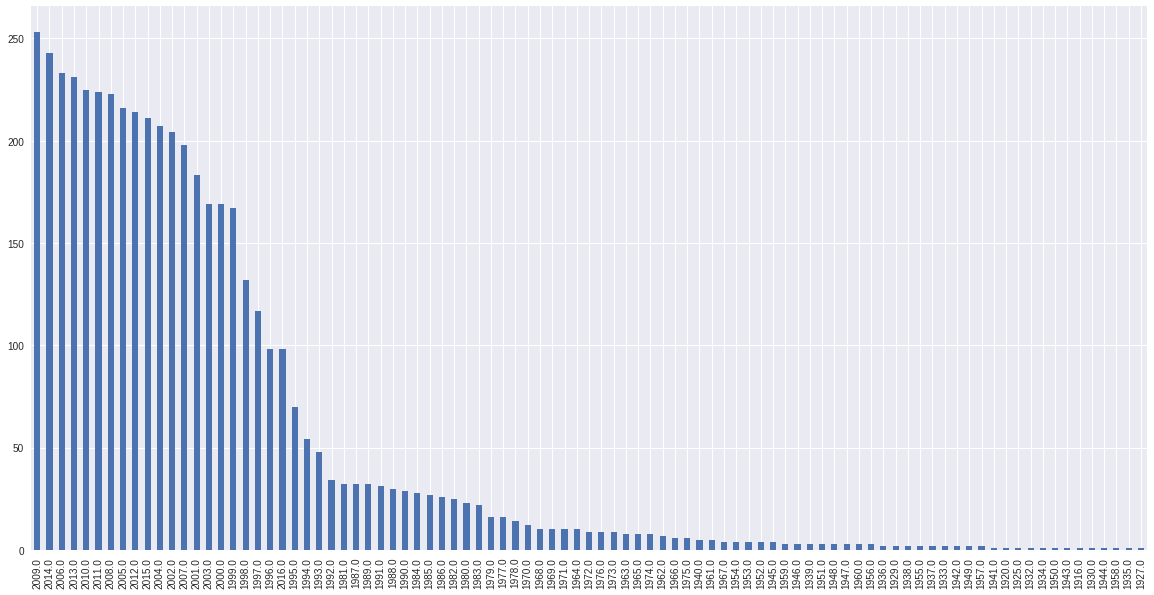

In [197]:
year.plot(kind="bar")

In [198]:
ratio = movies["aspect_ratio"].value_counts()
print ratio

2.35     2283
1.85     1867
1.78      108
1.37       99
1.33       66
1.66       63
16.00      45
2.39       15
2.20       14
4.00        7
2.00        5
1.75        3
2.40        3
2.76        3
2.55        2
1.50        2
2.24        1
1.20        1
1.18        1
1.44        1
1.77        1
1.89        1
Name: aspect_ratio, dtype: int64


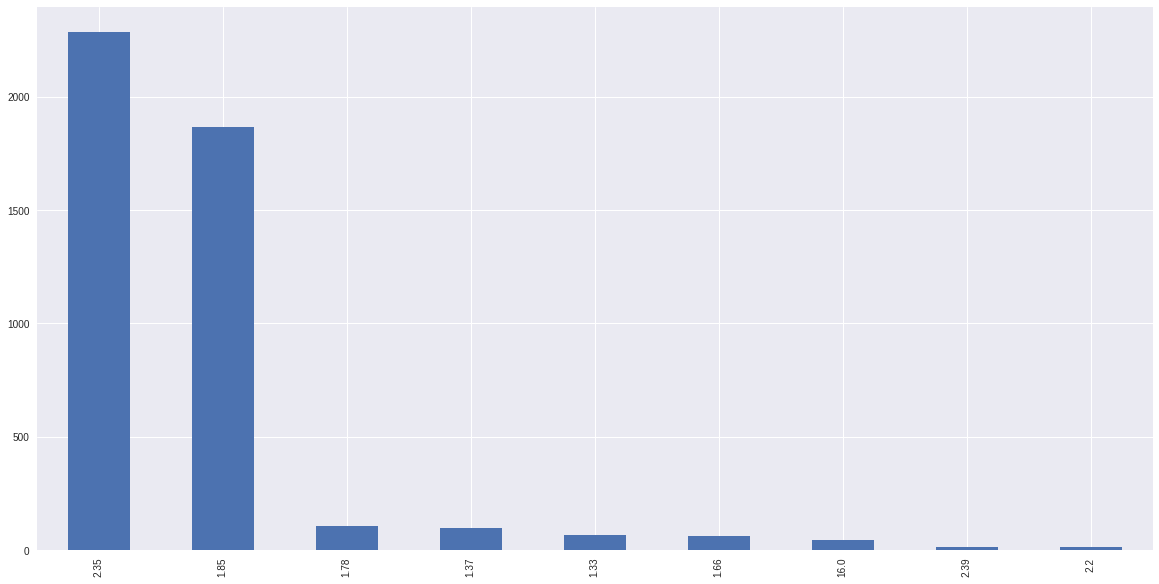

In [199]:
ratio[ratio > 10].plot(kind="bar")

In [200]:
#Begin Quantity Graphs

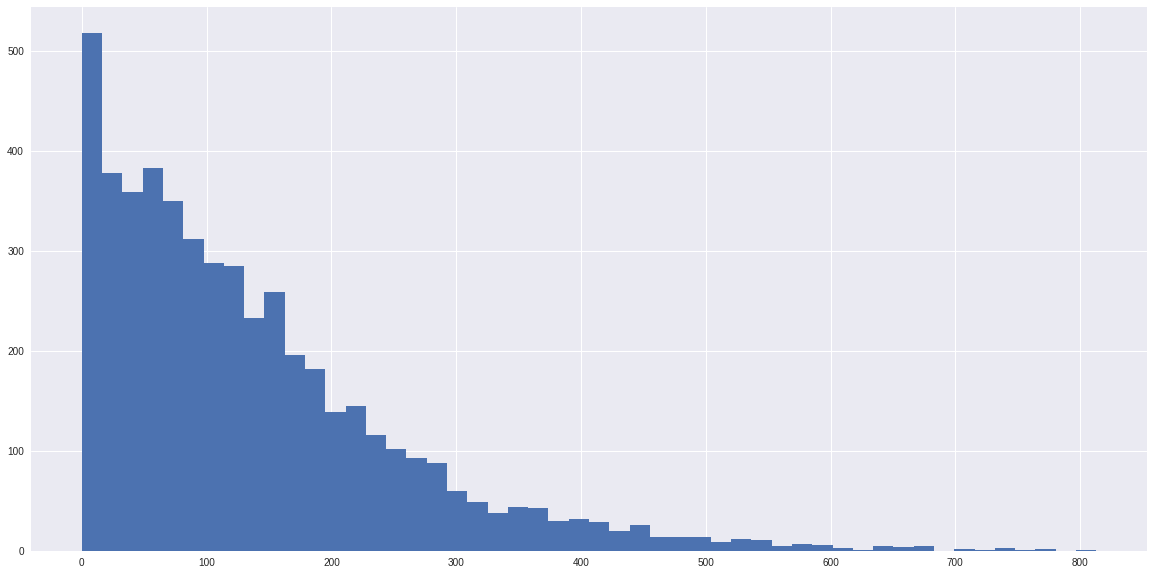

In [201]:
num_movies["num_critic_for_reviews"].hist(bins=50)

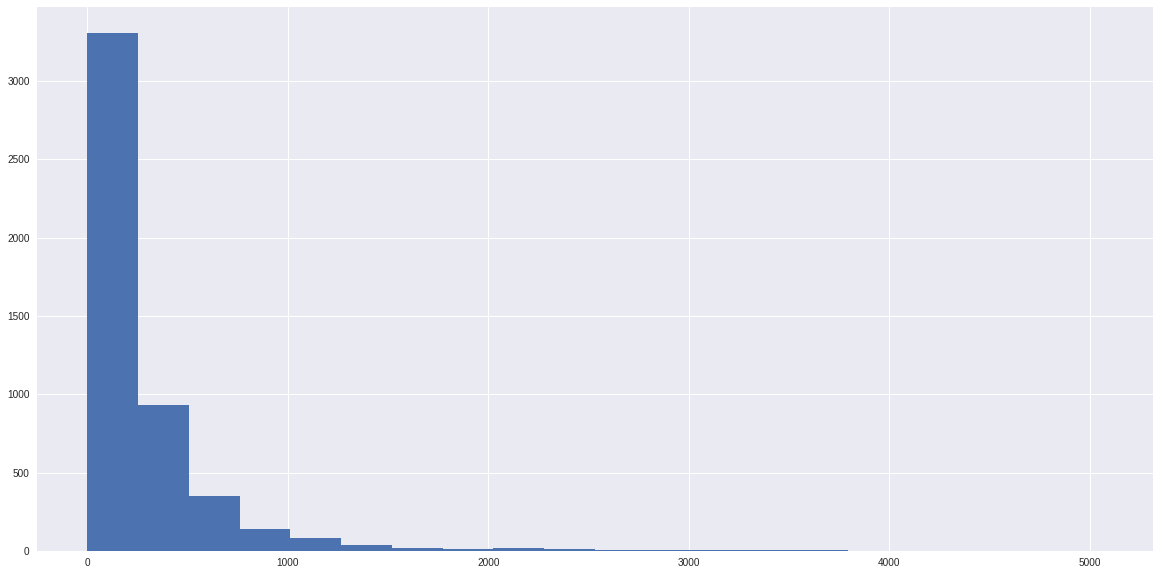

In [202]:
num_movies["num_user_for_reviews"].hist(bins=20)

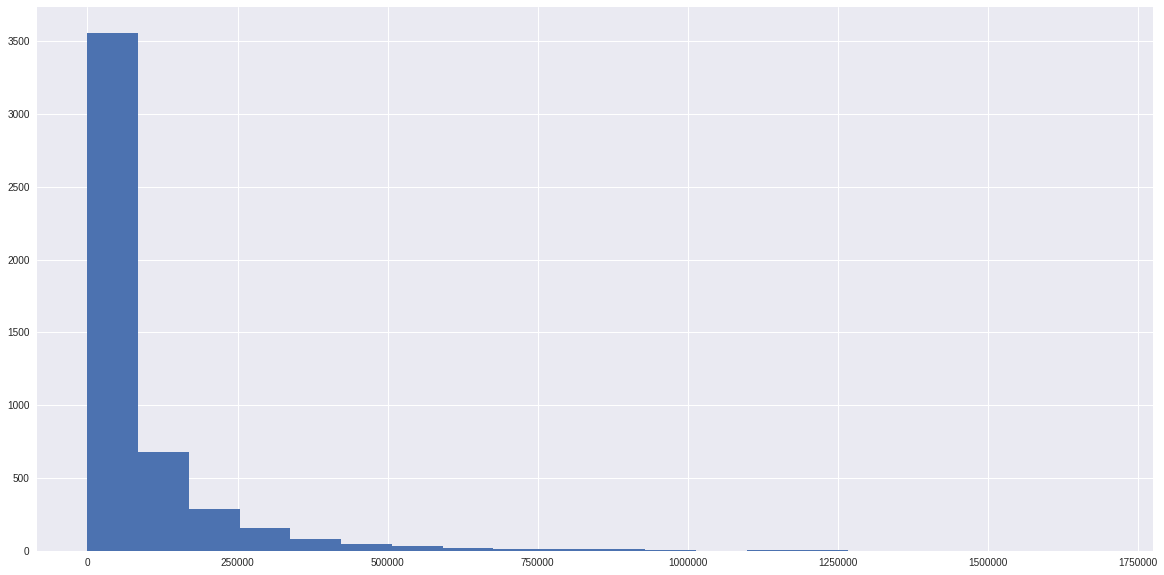

In [203]:
num_movies["num_voted_users"].hist(bins=20)

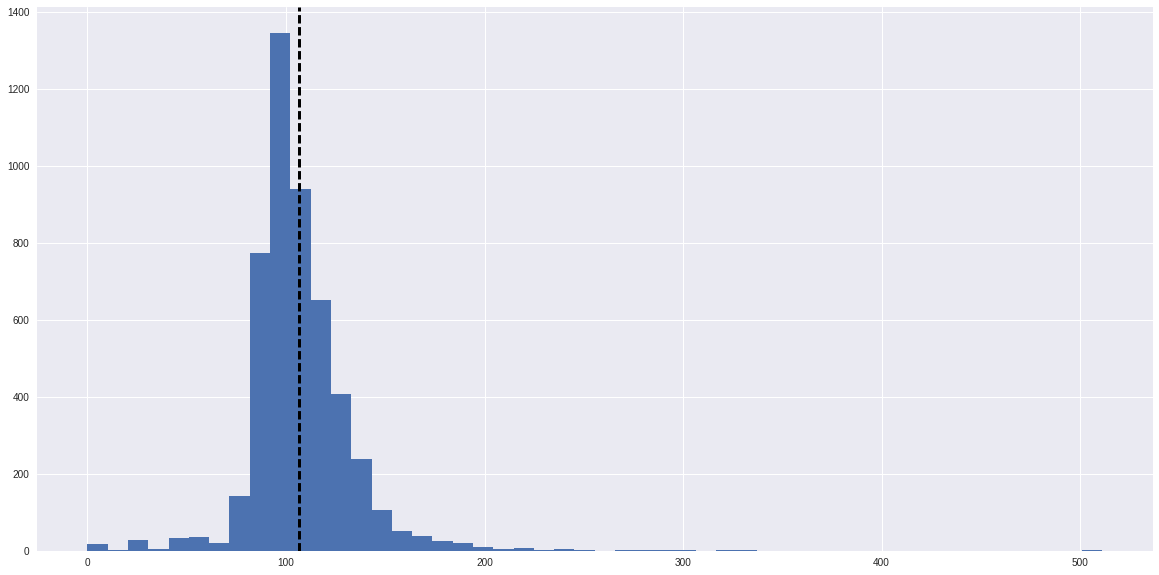

In [204]:
num_movies["duration"].hist(bins=50)
plt.axvline(num_movies["duration"].mean(), color='k', linestyle='dashed', linewidth=3)

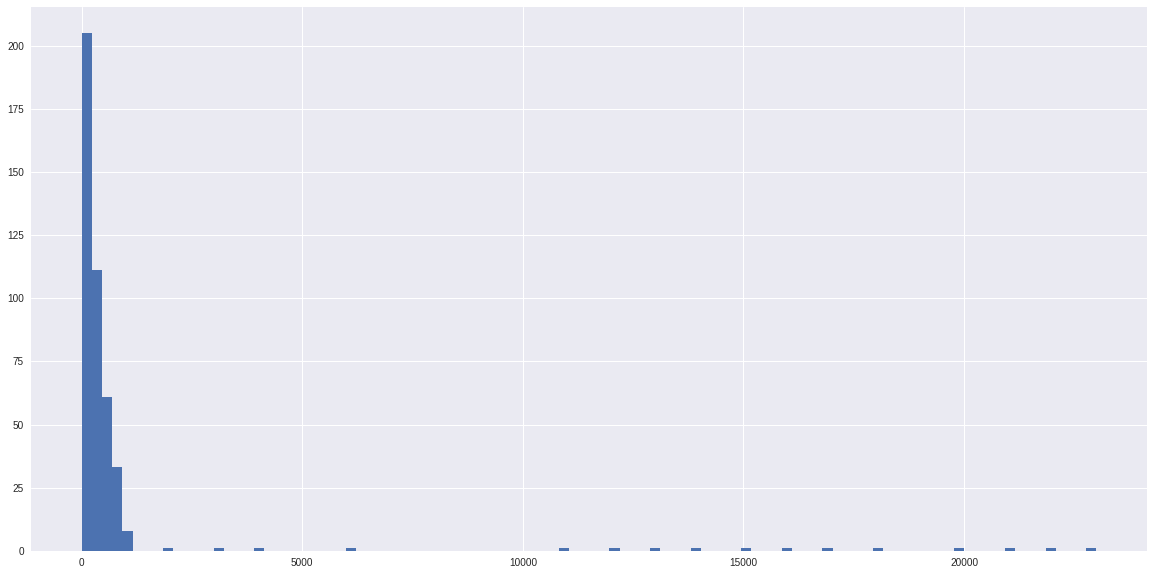

In [205]:
pos_dir_fb_likes = num_movies["director_facebook_likes"]
pos_dir_fb_likes[pos_dir_fb_likes > 0].drop_duplicates().hist(bins=100)

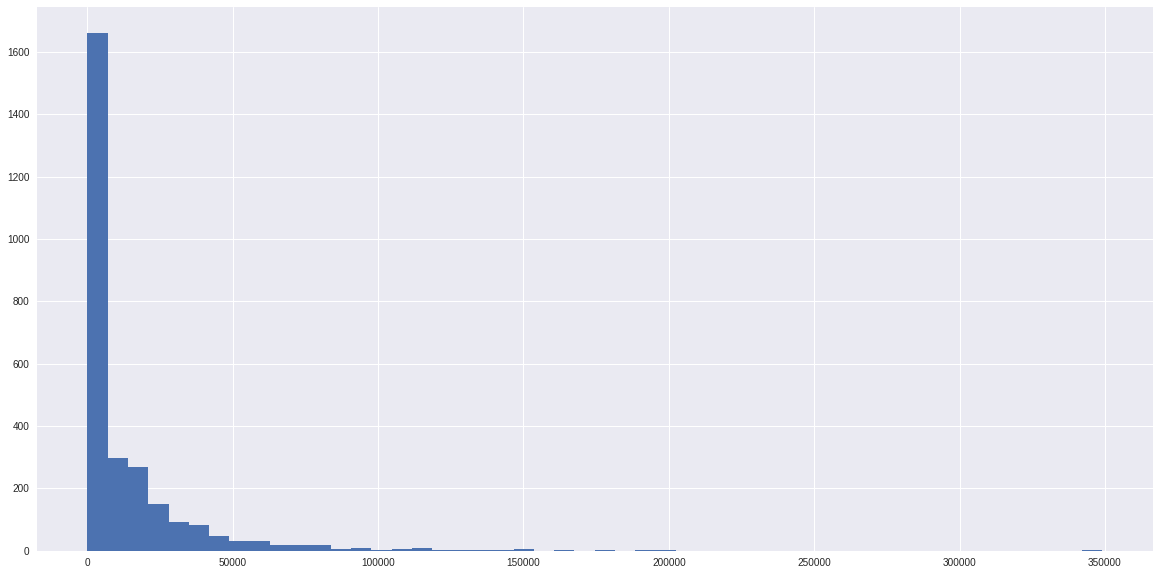

In [206]:
pos_fb_likes = num_movies["movie_facebook_likes"]
pos_fb_likes[pos_fb_likes > 0].hist(bins=50)

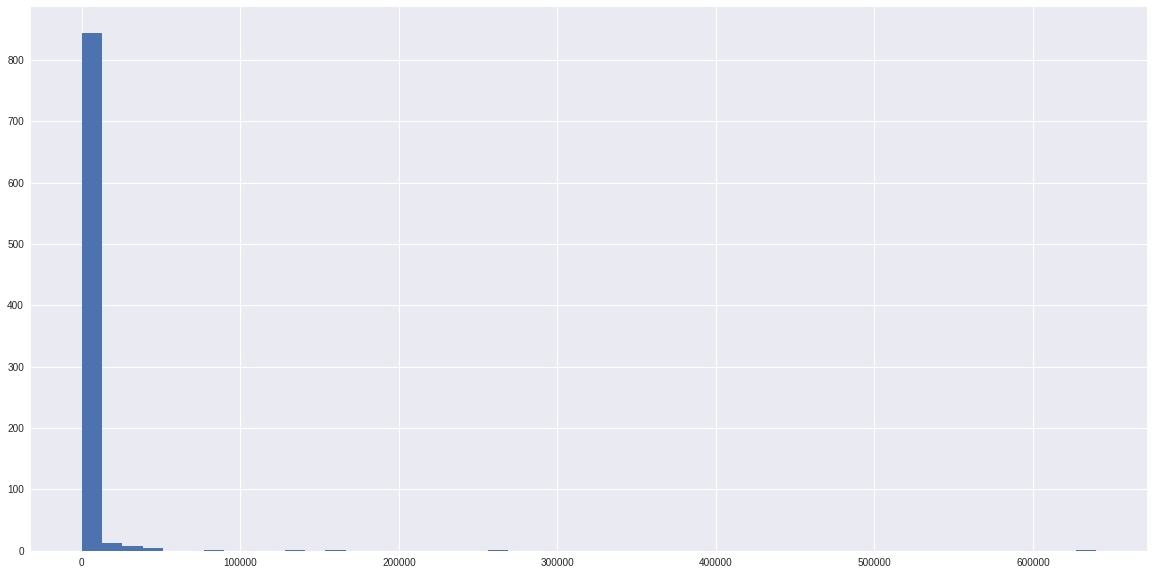

In [207]:
pos_1_fb_likes = num_movies["actor_1_facebook_likes"]
pos_1_fb_likes[pos_1_fb_likes > 0].drop_duplicates().hist(bins=50)

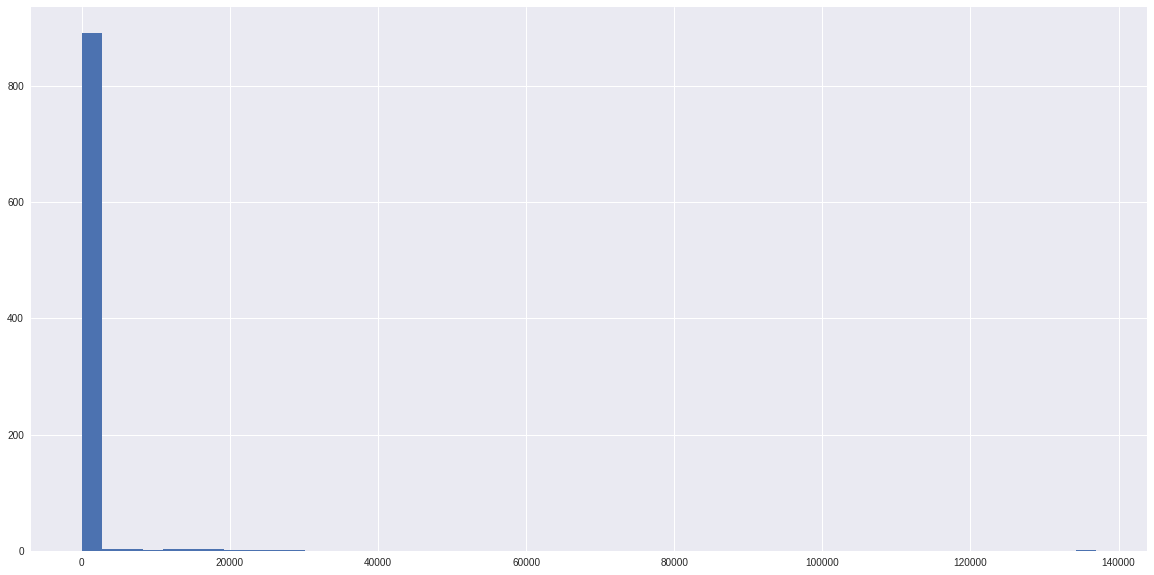

In [208]:
pos_2_fb_likes = num_movies["actor_2_facebook_likes"]
pos_2_fb_likes[pos_2_fb_likes > 0].drop_duplicates().hist(bins=50)

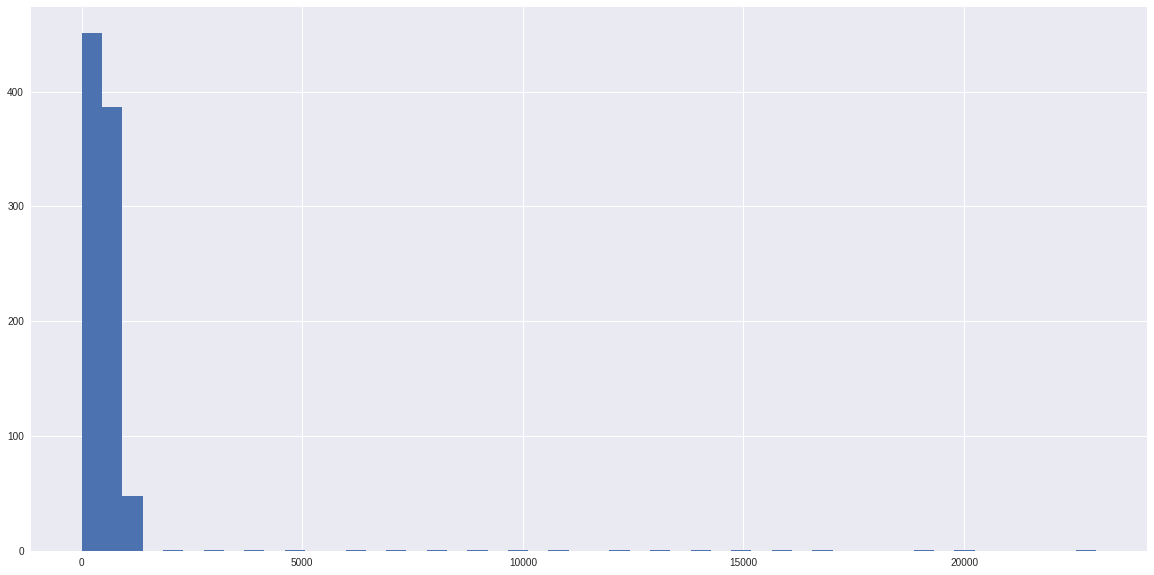

In [209]:
pos_3_fb_likes = num_movies["actor_3_facebook_likes"]
pos_3_fb_likes[pos_3_fb_likes > 0].drop_duplicates().hist(bins=50)

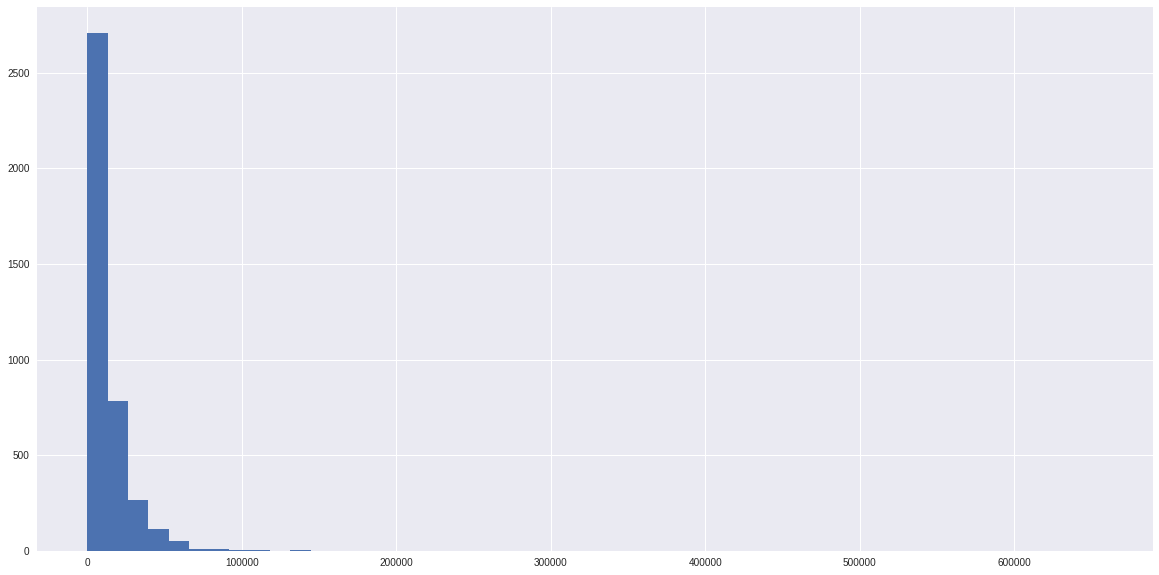

In [210]:
pos_cast_fb_likes = num_movies["cast_total_facebook_likes"]
pos_cast_fb_likes[pos_cast_fb_likes > 0].drop_duplicates().hist(bins=50)

0.0     2103
1.0     1224
2.0      702
3.0      369
4.0      198
5.0      113
6.0       75
7.0       48
8.0       37
9.0       17
10.0      10
15.0       6
11.0       5
12.0       4
13.0       2
19.0       1
14.0       1
31.0       1
43.0       1
Name: facenumber_in_poster, dtype: int64

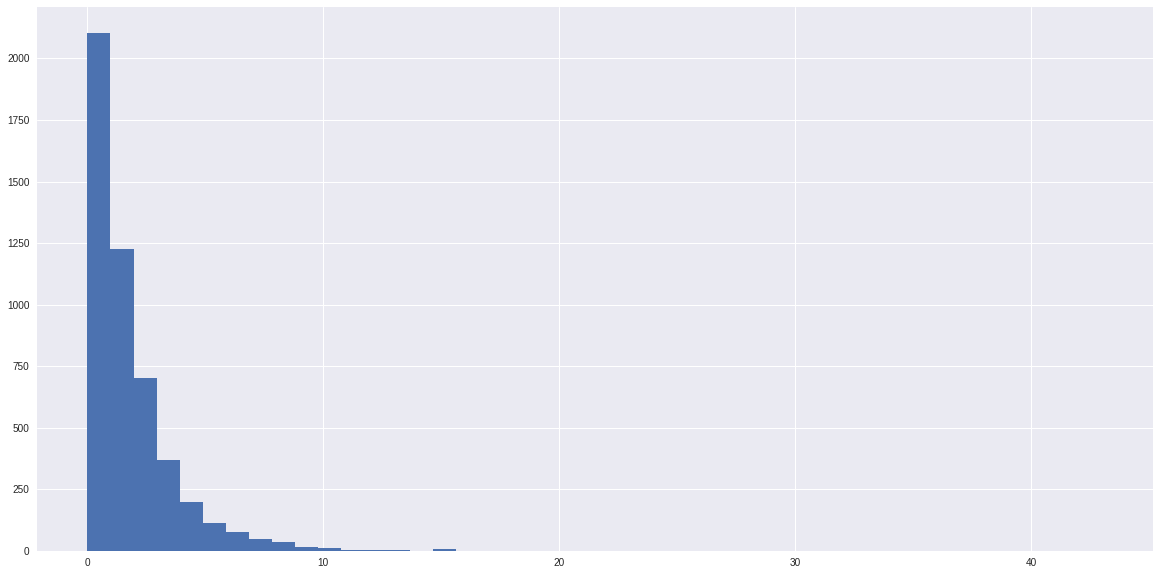

In [211]:
num_movies["facenumber_in_poster"].hist(bins=44)
num_movies["facenumber_in_poster"].value_counts()

In [212]:
#Finding out what a specific outlier is

movie_faces = zip(range(len(num_movies["facenumber_in_poster"])),num_movies["facenumber_in_poster"])

for movie in movie_faces:
    if movie[1] == 43:
        print movies["movie_title"][movie[0]]
        

        

When Did You Last See Your Father?Â 


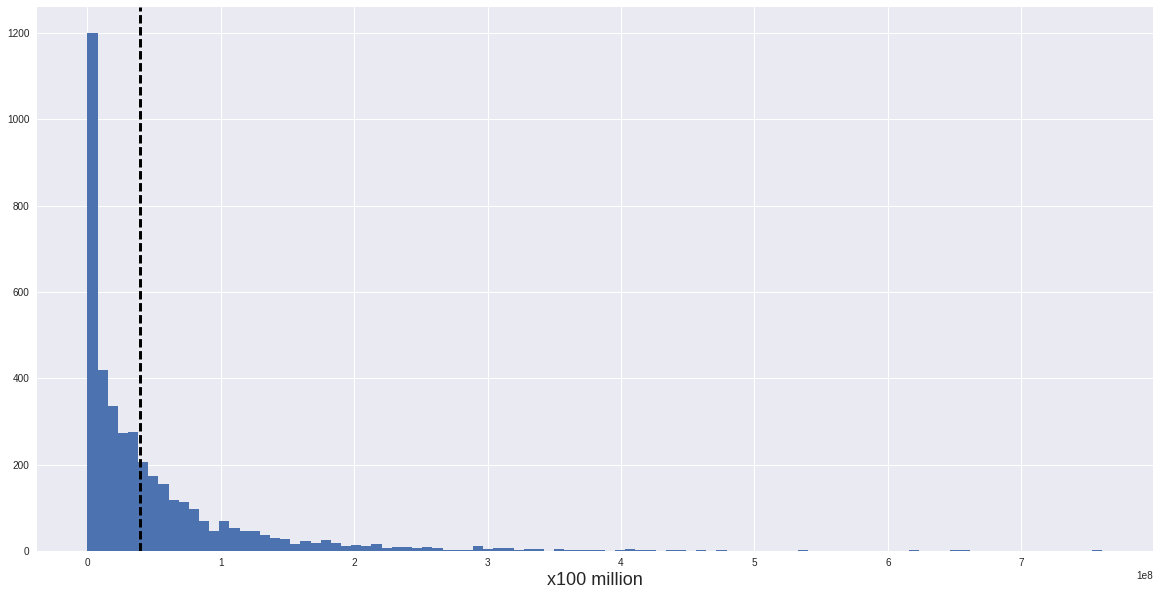

In [213]:
pos_gross = num_movies["gross"]
pos_gross[pos_gross > 0].hist(bins=100)
plt.xlabel('x100 million', fontsize=18)
plt.axvline(num_movies["gross"].mean(), color='k', linestyle='dashed', linewidth=3)

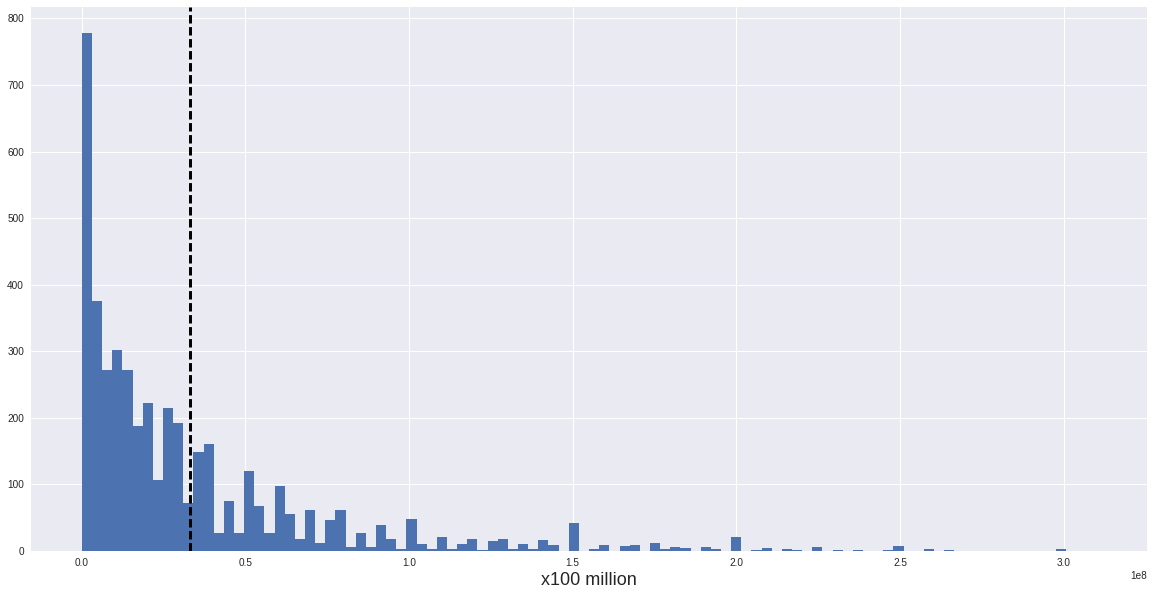

In [214]:
pos_budget = num_movies["budget"]
pos_budget[pos_budget > 0].hist(bins=100, range=[0,310000000])
plt.xlabel('x100 million', fontsize=18)
plt.axvline(num_movies["budget"].mean(), color='k', linestyle='dashed', linewidth=3)

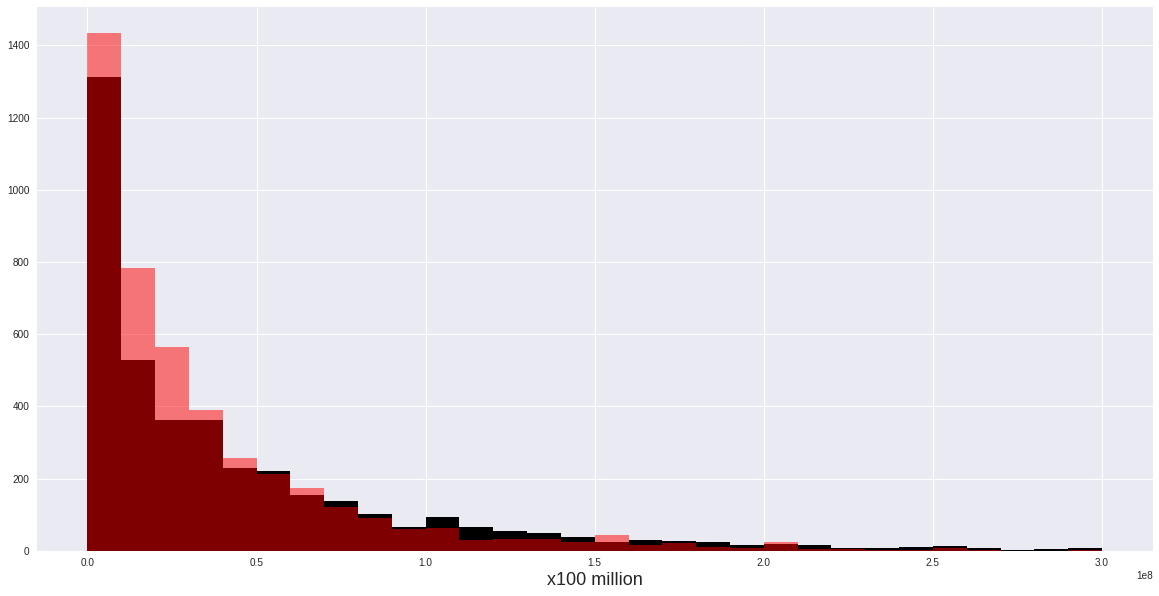

In [215]:
pos_gross[pos_gross > 0].hist(bins=30, alpha=1, range=[0,300000000], color='k')
pos_budget[pos_budget > 0].hist(bins=30, range=[0,300000000], alpha=0.5, color='r')
plt.xlabel('x100 million', fontsize=18)

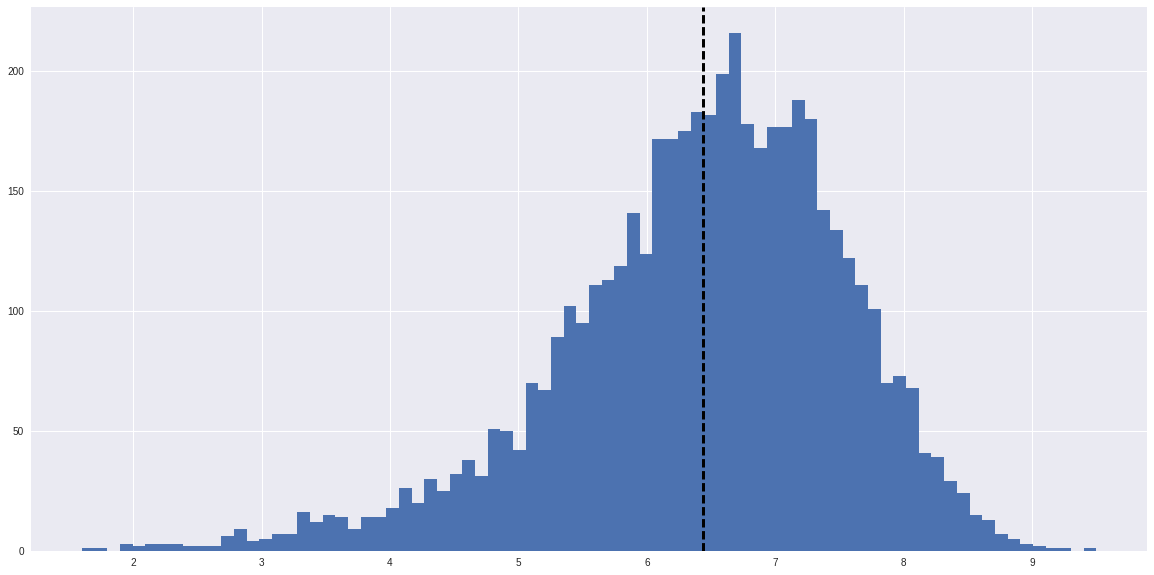

In [216]:
num_movies["imdb_score"].hist(bins=80)
plt.axvline(num_movies["imdb_score"].mean(), color='k', linestyle='dashed', linewidth=3)

In [217]:
top_movies = movies[["movie_title","imdb_score"]].sort_values("imdb_score", ascending = False).head(10)
worst_movies = movies[["movie_title","imdb_score"]].sort_values("imdb_score", ascending = True).head(10)
worst_movies = worst_movies.sort_values("imdb_score", ascending = False)
combo_movies = [top_movies, worst_movies]
combo = pd.concat(combo_movies)
combo.head(20)

,movie_title,imdb_score
2765,Towering InfernoÂ,9.5
1937,The Shawshank RedemptionÂ,9.3
3466,The GodfatherÂ,9.2
4409,Kickboxer: VengeanceÂ,9.1
2824,DekalogÂ,9.1
66,The Dark KnightÂ,9.0
2837,The Godfather: Part IIÂ,9.0
3481,FargoÂ,9.0
4822,12 Angry MenÂ,8.9
1874,Schindler's ListÂ,8.9


In [218]:
# End Basic Graphs


# Story Number 1
# Top Keywords
#Now to look at the top end movies of certain categories and then the prevailant themes.

In [219]:
source_count = 150
not_wanted = ["to", "and", "the", "boy", "in", "of", "girl", "based on", "based", "on", "box office"]
wc = 60

In [220]:
top500imdb = movies[["movie_title","imdb_score", "good_keywords"]].sort_values("imdb_score", ascending = False).head(source_count)
imdb_keywords = top500imdb["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)


In [221]:
listy = top500imdb["good_keywords"].values.T.tolist()
#print listy
#''.join([str(r) for v in listy for r in v]) 
flat_listy = []
for x in listy:
    try:
        for y in x:
            flat_listy.append(y)
    except: "Filler"
flater_listy = " ".join(flat_listy)

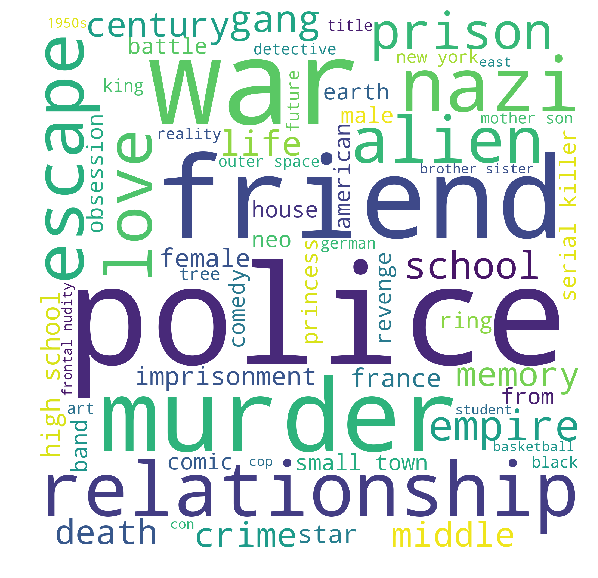

In [222]:
wordcloudimdb = WordCloud(width = 2000, height = 2000, stopwords=not_wanted, background_color='white', max_words = wc).generate(flater_listy)
plt.imshow(wordcloudimdb)
plt.axis("off")
plt.show()


In [223]:
culled_movies = movies.fillna(value=0, axis =1)

top500gross = movies[["movie_title","gross", "good_keywords"]].sort_values("gross", ascending = False).head(source_count)
gross_keywords = top500gross["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)


In [224]:
lister = top500gross["good_keywords"].values.T.tolist()
flat_lister = []
for x in lister:
    try:
        for y in x:
            flat_lister.append(y)
    except: "Filler"
flater_lister = " ".join(flat_lister)

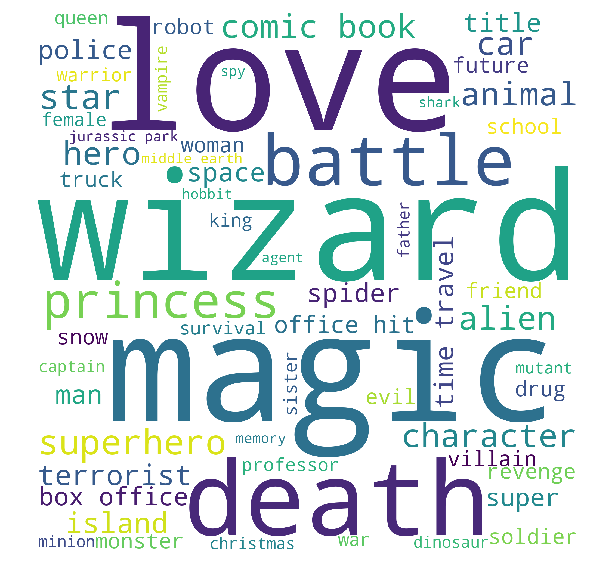

In [225]:
wordcloudgross = WordCloud(width = 2000, height = 2000, stopwords=not_wanted, background_color='white', max_words = wc).generate(flater_lister)
plt.imshow(wordcloudgross)
plt.axis("off")
plt.show()

In [226]:
top500budget = movies[["movie_title","budget", "good_keywords"]].sort_values("budget", ascending = False).head(source_count)
budget_keywords = top500budget["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)

In [227]:
listest = top500budget["good_keywords"].values.T.tolist()
flat_listest = []
for x in listest:
    try:
        for y in x:
            flat_listest.append(y)
    except: "Filler"
flater_listest = " ".join(flat_listest)

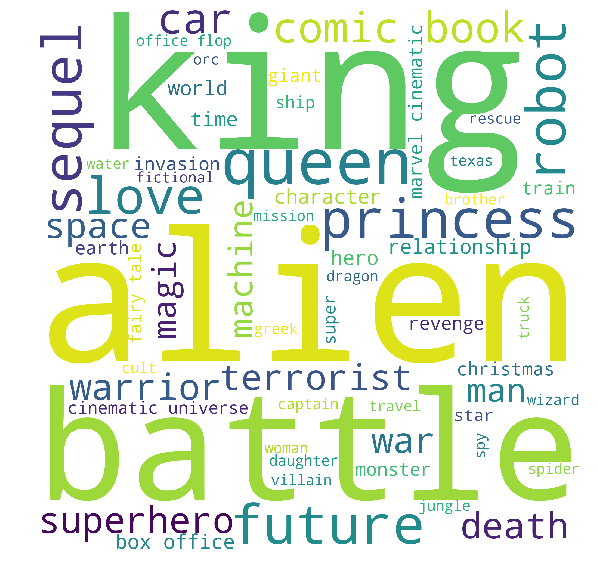

In [228]:
wordcloudbudget = WordCloud(width = 2000, height = 2000, stopwords=not_wanted, background_color='white', max_words = wc).generate(flater_listest)
plt.imshow(wordcloudbudget)
plt.axis("off")
plt.show()

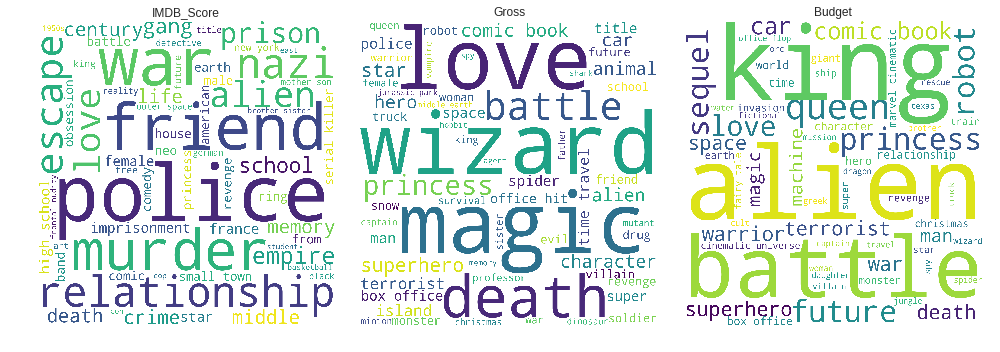

In [229]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14, 5))
ax1.imshow(wordcloudimdb, aspect='auto')
ax1.set_title('IMDB_Score')
ax1.axis("off")
ax2.imshow(wordcloudgross, aspect='auto')
ax2.set_title('Gross')
ax2.axis("off")
ax3.imshow(wordcloudbudget, aspect='auto')
ax3. set_title('Budget')
ax3.axis("off")
plt.tight_layout()

In [230]:
# Story number 3
# Most profitable films

In [231]:
movies["profit"] = (movies["gross"] - movies["budget"])
movies["ROI"] = ((movies["profit"]/movies["budget"])*100)

In [232]:
#profit_list = movies[["movie_title", "profit"]].sort_values("profit", ascending = False).head(15)
#print profit_list
profit_list = movies.sort_values("profit", ascending = False).head(15)
plist = profit_list['movie_title']
print plist

0                                          AvatarÂ 
29                                 Jurassic WorldÂ 
26                                        TitanicÂ 
3024           Star Wars: Episode IV - A New HopeÂ 
3080                   E.T. the Extra-TerrestrialÂ 
17                                   The AvengersÂ 
509                                 The Lion KingÂ 
240     Star Wars: Episode I - The Phantom MenaceÂ 
66                                The Dark KnightÂ 
439                              The Hunger GamesÂ 
812                                      DeadpoolÂ 
186               The Hunger Games: Catching FireÂ 
697                                 Jurassic ParkÂ 
521                               Despicable Me 2Â 
814                               American SniperÂ 
Name: movie_title, dtype: object


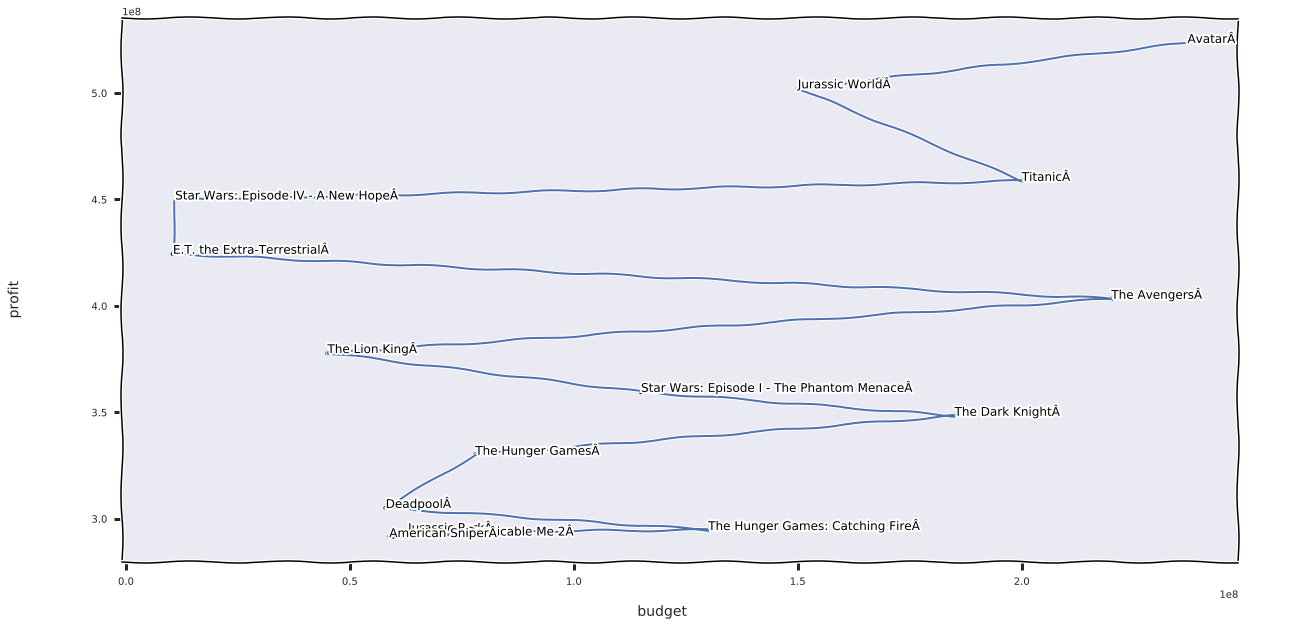

<ggplot: (8733556012657)>

In [236]:
profit_gg = ggplot(aes(x='budget', y='profit'), data=profit_list)
profit_gg + geom_point() + theme_xkcd() + geom_text(aes(label='movie_title')) 

#, size=('gross')

KeyError: 1

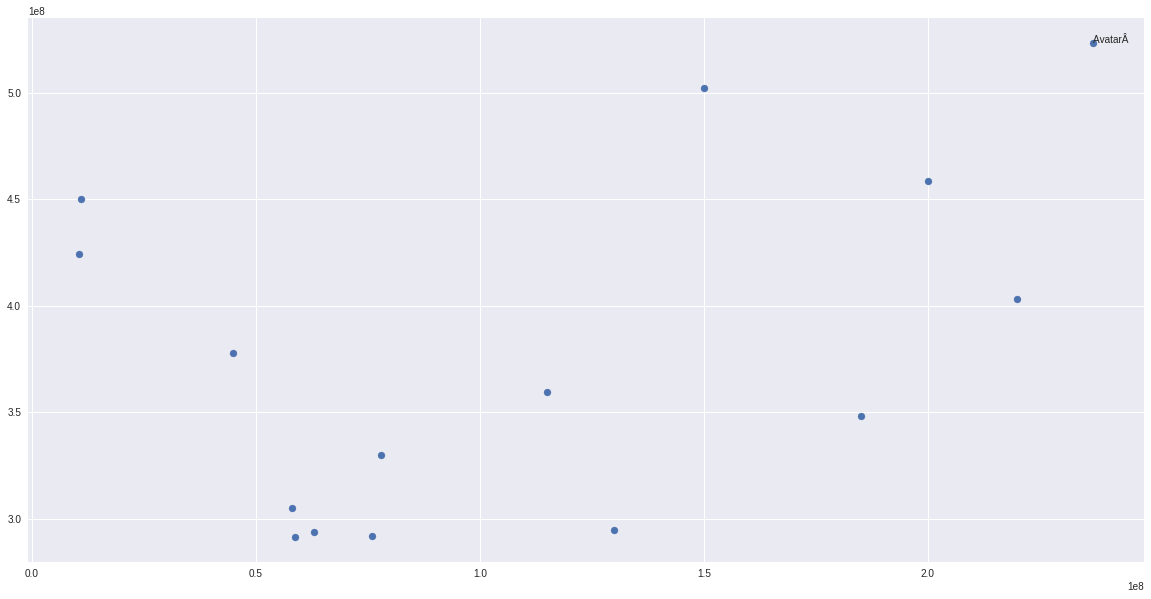

In [234]:
y = (profit_list['profit'])
z = (profit_list['budget'])
n = (profit_list['movie_title'])

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

In [ ]:
print profit_list['movie_title']

In [ ]:
roi_head = movies[["movie_title", "ROI"]].sort_values("ROI", ascending = False).head(30)
print roi_head
roi_list = movies.sort_values("ROI", ascending = False).head(30)
print roi_list


In [ ]:
roi_gg = ggplot(aes(x='budget', y='profit'), data=roi_list)
roi_gg + geom_point() + theme_xkcd() #geom_text(aes(label='movie_title')) 
